#Welcome to Backprojection T cell
##Run all the cells in order

In [1]:
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318083 sha256=ea7dc68a90426a526ee4ae1a7c0e25968bdb70d5d24742ca8a5e48739f028bb3
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [2]:
%load_ext rpy2.ipython

#Uploading Files depending on location

###If files are in local:
#####A) Either load the files to Google Colab directly using the Google Colab feature in the image shown below. And then continue with the rest of the code.
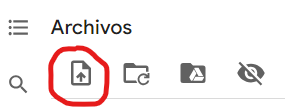
#####B) Upload to your Google Drive the files, and go to the previous step. And then continue with the following code.
#####Google Drive Accession:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Packages and Libraries

In [4]:
%%R
install.packages('yaml')
install.packages('dplyr')

library(yaml)
library(dplyr)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpZ8hvxU/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpZ8hvxU/downloaded_packages’

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




#Importing paths

In [5]:
%%R
Data_dir <- "/content/drive/MyDrive/BEHAV3D-main/demos/tcell_demo/data" #@param {type:"string"}
Output_dir <- "/content/drive/MyDrive/BEHAV3D-main/demos/tcell_demo/example_output" #@param {type:"string"}
Metadata_dir <- "/content/drive/MyDrive/BEHAV3D-main/demos/tcell_demo/BEHAV3D_metadata.tsv" #@param {type:"string"}
reference_map <- "/content/drive/MyDrive/BEHAV3D-main/references/Behavioral_Referance_map_git" #@param {type:"string"}
model_output_path <- "/content/drive/MyDrive/BEHAV3D-main/references/TrainedRandomForest.Rdata" #@param {type:"string"}


#Actual Code for Backprojection

In [6]:
%%R
output_dir<-Output_dir
output_dir=paste0(output_dir,"/tcell_behavior/results/")

#import metadata
metadata=read.csv(Metadata_dir, sep="\t", check.names=FALSE)

## read master dataset that contains both TrackID and TrackID2
master<-readRDS(paste0(output_dir,"raw_tcell_track_data.rds"))
classified_tracks<-readRDS(paste0(output_dir,"classified_tcell_track_data_summary.rds"))
### keep only the TrackID2 that were classified
master2 <-master%>%filter(TrackID %in% classified_tracks$TrackID )
clustertype<-classified_tracks[,c("TrackID", "cluster2")]
clustertype<- clustertype[!duplicated(clustertype$TrackID),]
master3 <- left_join(master2 ,clustertype, by=c("TrackID"))

for(to_backproject in unique(master3$basename)){
  To_export<-subset(master3,basename==to_backproject)
  To_export<-To_export[!duplicated(To_export$Original_TrackID),c("Original_TrackID","cluster2")]
  To_export_list<-split(To_export,To_export$cluster2)
  ### Save this list that allows to identify in the imaging dataset to which cluster does each cell belong to.
  backproject_dir <- file.path("backprojection", to_backproject)
  dir.create(backproject_dir, recursive=TRUE)
  write(paste(as.character(To_export_list), sep="' '", collapse=", "), paste0(backproject_dir,"/Backproject.txt"))
}

# Set the source and destination paths
source_dir <- "/content/backprojection"  # Replace with the actual source path

# Copy the folder
file.copy(source_dir, output_dir, recursive = TRUE)

[1] TRUE
